# Imports and Functions

In [1]:
from sunlab.environment.base.cpu import *
from sunlab.environment.base.extras import *
from sunlab.globals import FILES
from sunlab.sunflow import *

# Setup

In [2]:
XYM = np.load(DIR_ROOT + "extra_data/OutlineXYM.npy")

In [3]:
XYM.shape

(4, 800, 800)

In [4]:
base_nt = np.zeros((XYM.shape[1],XYM.shape[2]))
base_nt = XYM[2,:,:]
base_nt = base_nt + 1
base_nt[base_nt != 1] = 0
base_nt = base_nt.astype(np.bool_)
np.unique(base_nt)

array([False,  True])

In [5]:
base_wt = np.zeros((XYM.shape[1],XYM.shape[2]))
base_wt = XYM[3,:,:]
base_wt = base_wt + 1
base_wt[base_wt != 1] = 0
base_wt = base_wt.astype(np.bool_)
np.unique(base_wt)

array([False,  True])

In [6]:
exclude = (base_nt ^ base_wt) & base_nt
overlap = base_nt & base_wt

In [7]:
outline = np.ones((XYM.shape[1],XYM.shape[2],4))
outline[...,0] -= exclude.astype(np.float32)
outline[...,1] -= base_nt.astype(np.float32)
outline[...,2] -= base_nt.astype(np.float32)
outline[...,3] = base_nt.astype(np.float32)
SemanticOutline = outline.copy()
SemanticExtent = [np.min(XYM[0,...]),np.max(XYM[0,...]),np.min(XYM[1,...]),np.max(XYM[1,...])]

# Runtime Parameters

In [12]:
SAVE_EXTRAS = False

In [9]:
g_Base = lambda *args: DIR_ROOT + "Figures/"

# Plots

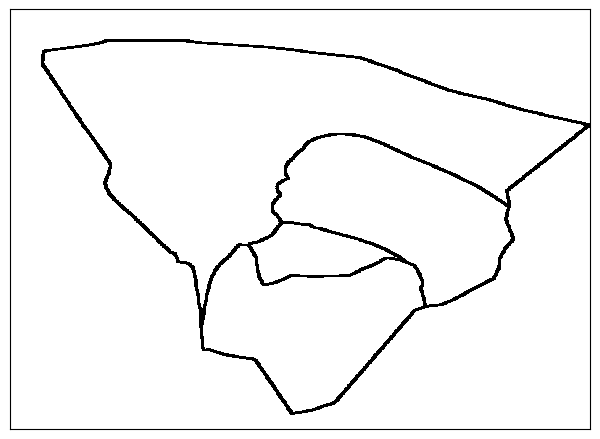

In [10]:
plt.apply_boundary()
if SAVE_EXTRAS:
    plt.save(g_Base() + "Model/Theory/PhenotypeBoundaries")

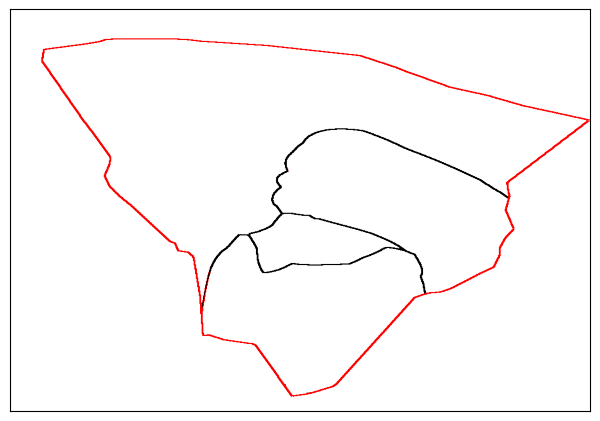

In [11]:
plt.imshow(SemanticOutline, extent=SemanticExtent, origin='lower')
if SAVE_EXTRAS:
    plt.save(g_Base() + "Model/Theory/PhenotypeBoundariesNonPhysicalBoundaryRed")

# END